In [ ]:
# @title Importer les librairies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 1. Exploration des Données

In [ ]:


import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.impute import SimpleImputer

In [ ]:
# @title Chargez le jeu de données "diabetes_dataset.csv"
separateur = ","
path = "diabetes_dataset.csv"
# Lire le fichier CSV en utilisant pandas
df = pd.read_csv(path, sep=separateur)



In [ ]:
# @title Affichez 10 premieres lignes du jeu de données.
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35,0,33.6,0.627,50.0,1
1,1.0,85,66,29,0,26.6,0.351,31.0,0
2,8.0,183,64,0,0,23.3,0.672,NaN,1
3,1.0,89,66,23,94,28.1,0.167,21.0,0
4,0.0,137,40,35,168,43.1,2.288,33.0,1
5,5.0,116,74,0,0,25.6,0.201,30.0,0
6,3.0,78,50,32,88,31.0,0.248,26.0,1
7,10.0,115,0,0,0,35.3,0.134,NaN,0
8,2.0,197,70,45,543,30.5,0.158,53.0,1
9,8.0,125,96,0,0,0.0,0.232,54.0,1


In [ ]:
# @title Affichez les informations générales et les statistiques descriptives des variables.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               722 non-null    float64
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       614 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,722.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,614.000000,768.000000
mean,3.818560,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,32.907166,0.348958
std,3.359882,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.503437,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,40.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# @title Vérifier s'il y a des valeurs manquantes (avant traitement)
display("\nValeurs manquantes par colonne :")
df.isnull().sum()

'\nValeurs manquantes par colonne :'

,0
Pregnancies,46
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,154
Outcome,0


In [ ]:
# Remplacement des valeurs manquantes par le mode
for column in df.columns:
    mode_value = df[column].mode()[0]
    df[column] = df[column].fillna(mode_value)

In [ ]:
# Remplacement des valeurs manquantes par le mode
imputer_mode = SimpleImputer(strategy='most_frequent')

#imputer_mode = SimpleImputer(strategy="mean"), "median" , "constant"

df['Pregnancies'] = imputer_mode.fit_transform(df[['Pregnancies']])
df['Age'] = imputer_mode.fit_transform(df[['Age']])

In [ ]:
# @title Vérifier s'il y a des valeurs manquantes (après traitement)
display("\nValeurs manquantes par colonne :")
df.isnull().sum()

'\nValeurs manquantes par colonne :'

,0
Pregnancies,46
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,154
Outcome,0


In [ ]:
# @title Fonction pour identifier les outliers
# outliers = valeur existent mais est irealiste ou extreme

def detect_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #Slicing
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers




In [ ]:
outliers = detect_outliers_iqr(df, 'BMI')
display(outliers)

171

In [ ]:
# @title Remplacer les outliers par la mediane
def replace_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median = df[column].median()

    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median, df[column])
    return df

df = replace_outliers_iqr(df, 'BMI')


In [ ]:

# Re-detect outliers on the updated DataFrame
outliers_updated = detect_outliers_iqr(df, 'BMI')

# Now print the size of the updated outliers
print(outliers_updated.size)


9


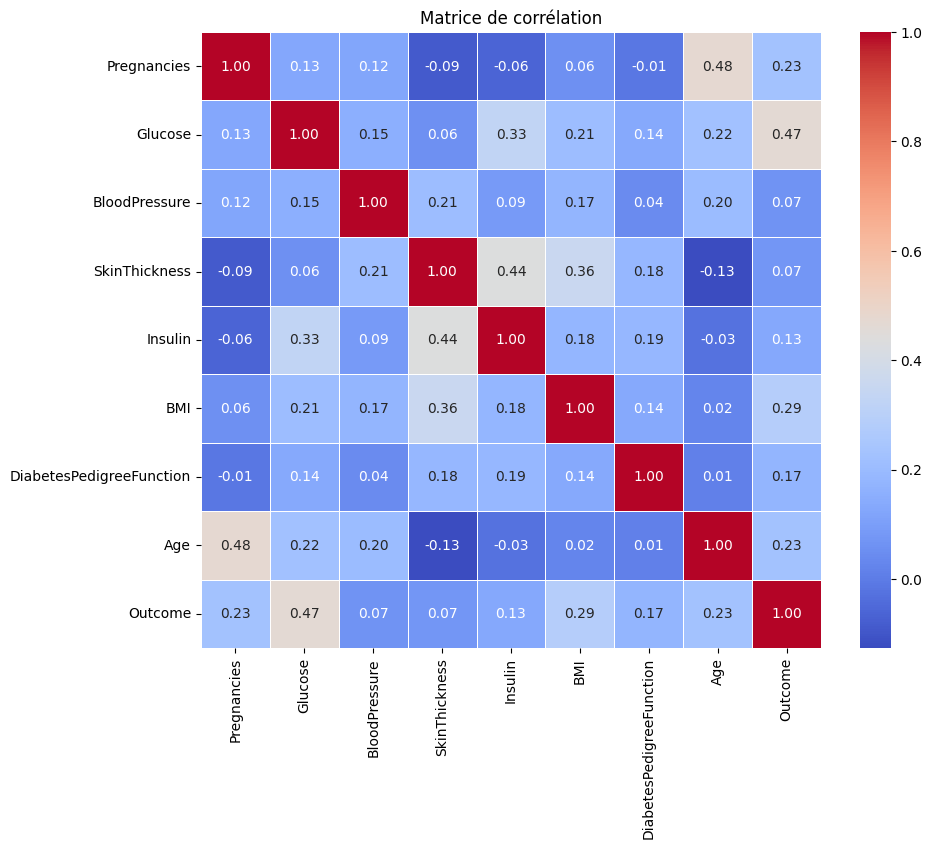

In [ ]:
# @title Heatmap des corrélations
# Calculer la matrice de corrélation
corr_matrix = df.corr()

# Tracer la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Ajouter un titre
plt.title("Matrice de corrélation")

plt.show()

In [ ]:
# @title Identification des variables les plus corrélées avec Outcome
corr_with_mpg = corr_matrix['Outcome'].sort_values(ascending=False)
print("Variables les plus corrélées avec 'Outcome' :\n", )
corr_with_mpg


Variables les plus corrélées avec 'Outcome' :



,Outcome
Outcome,1.000000
Glucose,0.466581
BMI,0.286640
Pregnancies,0.230046
Age,0.227276
DiabetesPedigreeFunction,0.173844
Insulin,0.130548
SkinThickness,0.074752
BloodPressure,0.065068


In [ ]:
# @title Normalisez les données numériques (StandardScaler).
numeric_df = df.select_dtypes(include=[np.number])
numeric_df = numeric_df.drop(['Outcome'], axis=1)
# Initialisation du StandardScaler
scaler = StandardScaler()

# Normalisation des données
scaled_df = scaler.fit_transform(numeric_df)

# Création d'un nouveau DataFrame avec les données normalisées
numeric_df_normalized = pd.DataFrame(scaled_df, columns=numeric_df.columns)